<a href="https://colab.research.google.com/github/Pravallikavyas/Task-7/blob/main/Copy_of_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [2]:
df1=pd.read_csv('/content/Social_Network_Ads.csv')
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Class 0: 257
Class 1: 143
Proportion of class 0 is  64.25 %


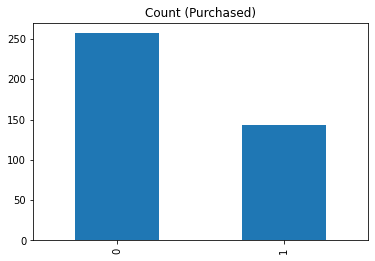

In [30]:
target_count = df1.Purchased.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
target_count.plot(kind='bar', title='Count (Purchased)');

**Splitting the dataset into the Training set and Test set**

In [3]:
X=df1.loc[:,['Age','EstimatedSalary']].values
y=df1.loc[:,'Purchased'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
#X_test=scaler.transofrm(X_test)

**Fitting Decision Tree Classification to the Training set**

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [13]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

**Making the Confusion Matrix**

In [34]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(c_m)

Confusion Matrix:
[[29 24]
 [20  7]]


**Visualising the Training set results**

Test set accuracy: 0.81
Test set auc: 0.81
Train set AUC :  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


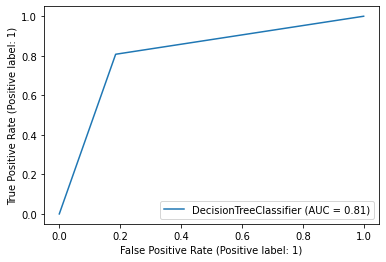

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt,X_test,y_test)
acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

**Visualising the Test set results**

In [15]:
from sklearn.model_selection import cross_val_score 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy=cross_val_score(dt, X_train, y_train, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.83125  Cross val score :  0.828125
Depth  :  2  Training Accuracy :  0.9125  Cross val score :  0.9
Depth  :  3  Training Accuracy :  0.915625  Cross val score :  0.8875
Depth  :  4  Training Accuracy :  0.934375  Cross val score :  0.89375
Depth  :  5  Training Accuracy :  0.94375  Cross val score :  0.85625
Depth  :  6  Training Accuracy :  0.959375  Cross val score :  0.878125
Depth  :  7  Training Accuracy :  0.96875  Cross val score :  0.86875
Depth  :  8  Training Accuracy :  0.98125  Cross val score :  0.865625
Depth  :  9  Training Accuracy :  0.990625  Cross val score :  0.865625
Depth  :  10  Training Accuracy :  0.996875  Cross val score :  0.865625
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.853125


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth =2)
dt.fit(X_train, y_train)
importance = dt.feature_importances_
list(zip(importance,X_test))

[(0.6398987060105819, array([   46, 82000])),
 (0.3601012939894182, array([   18, 44000]))]

[Text(0.5, 0.875, 'X[0] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(0.25, 0.625, 'X[1] <= 89500.0\ngini = 0.289\nsamples = 228\nvalue = [188, 40]'),
 Text(0.125, 0.375, 'X[0] <= 36.5\ngini = 0.081\nsamples = 189\nvalue = [181, 8]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 125\nvalue = [125, 0]'),
 Text(0.1875, 0.125, 'gini = 0.219\nsamples = 64\nvalue = [56, 8]'),
 Text(0.375, 0.375, 'X[1] <= 119000.0\ngini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.75, 0.625, 'X[0] <= 52.5\ngini = 0.287\nsamples = 92\nvalue = [16, 76]'),
 Text(0.625, 0.375, 'X[1] <= 37500.0\ngini = 0.371\nsamples = 61\nvalue = [15, 46]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.6875, 0.125, 'gini = 0.449\nsamples = 44\nvalue = [15, 29]'),
 Text(0.875, 0.375, 'X[1] <= 44000.0\ngini = 0.062\nsamples = 31\nvalue = [1, 30

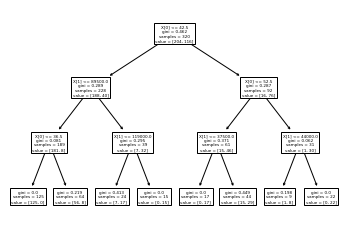

In [33]:
from sklearn import tree
tree.plot_tree(dt)

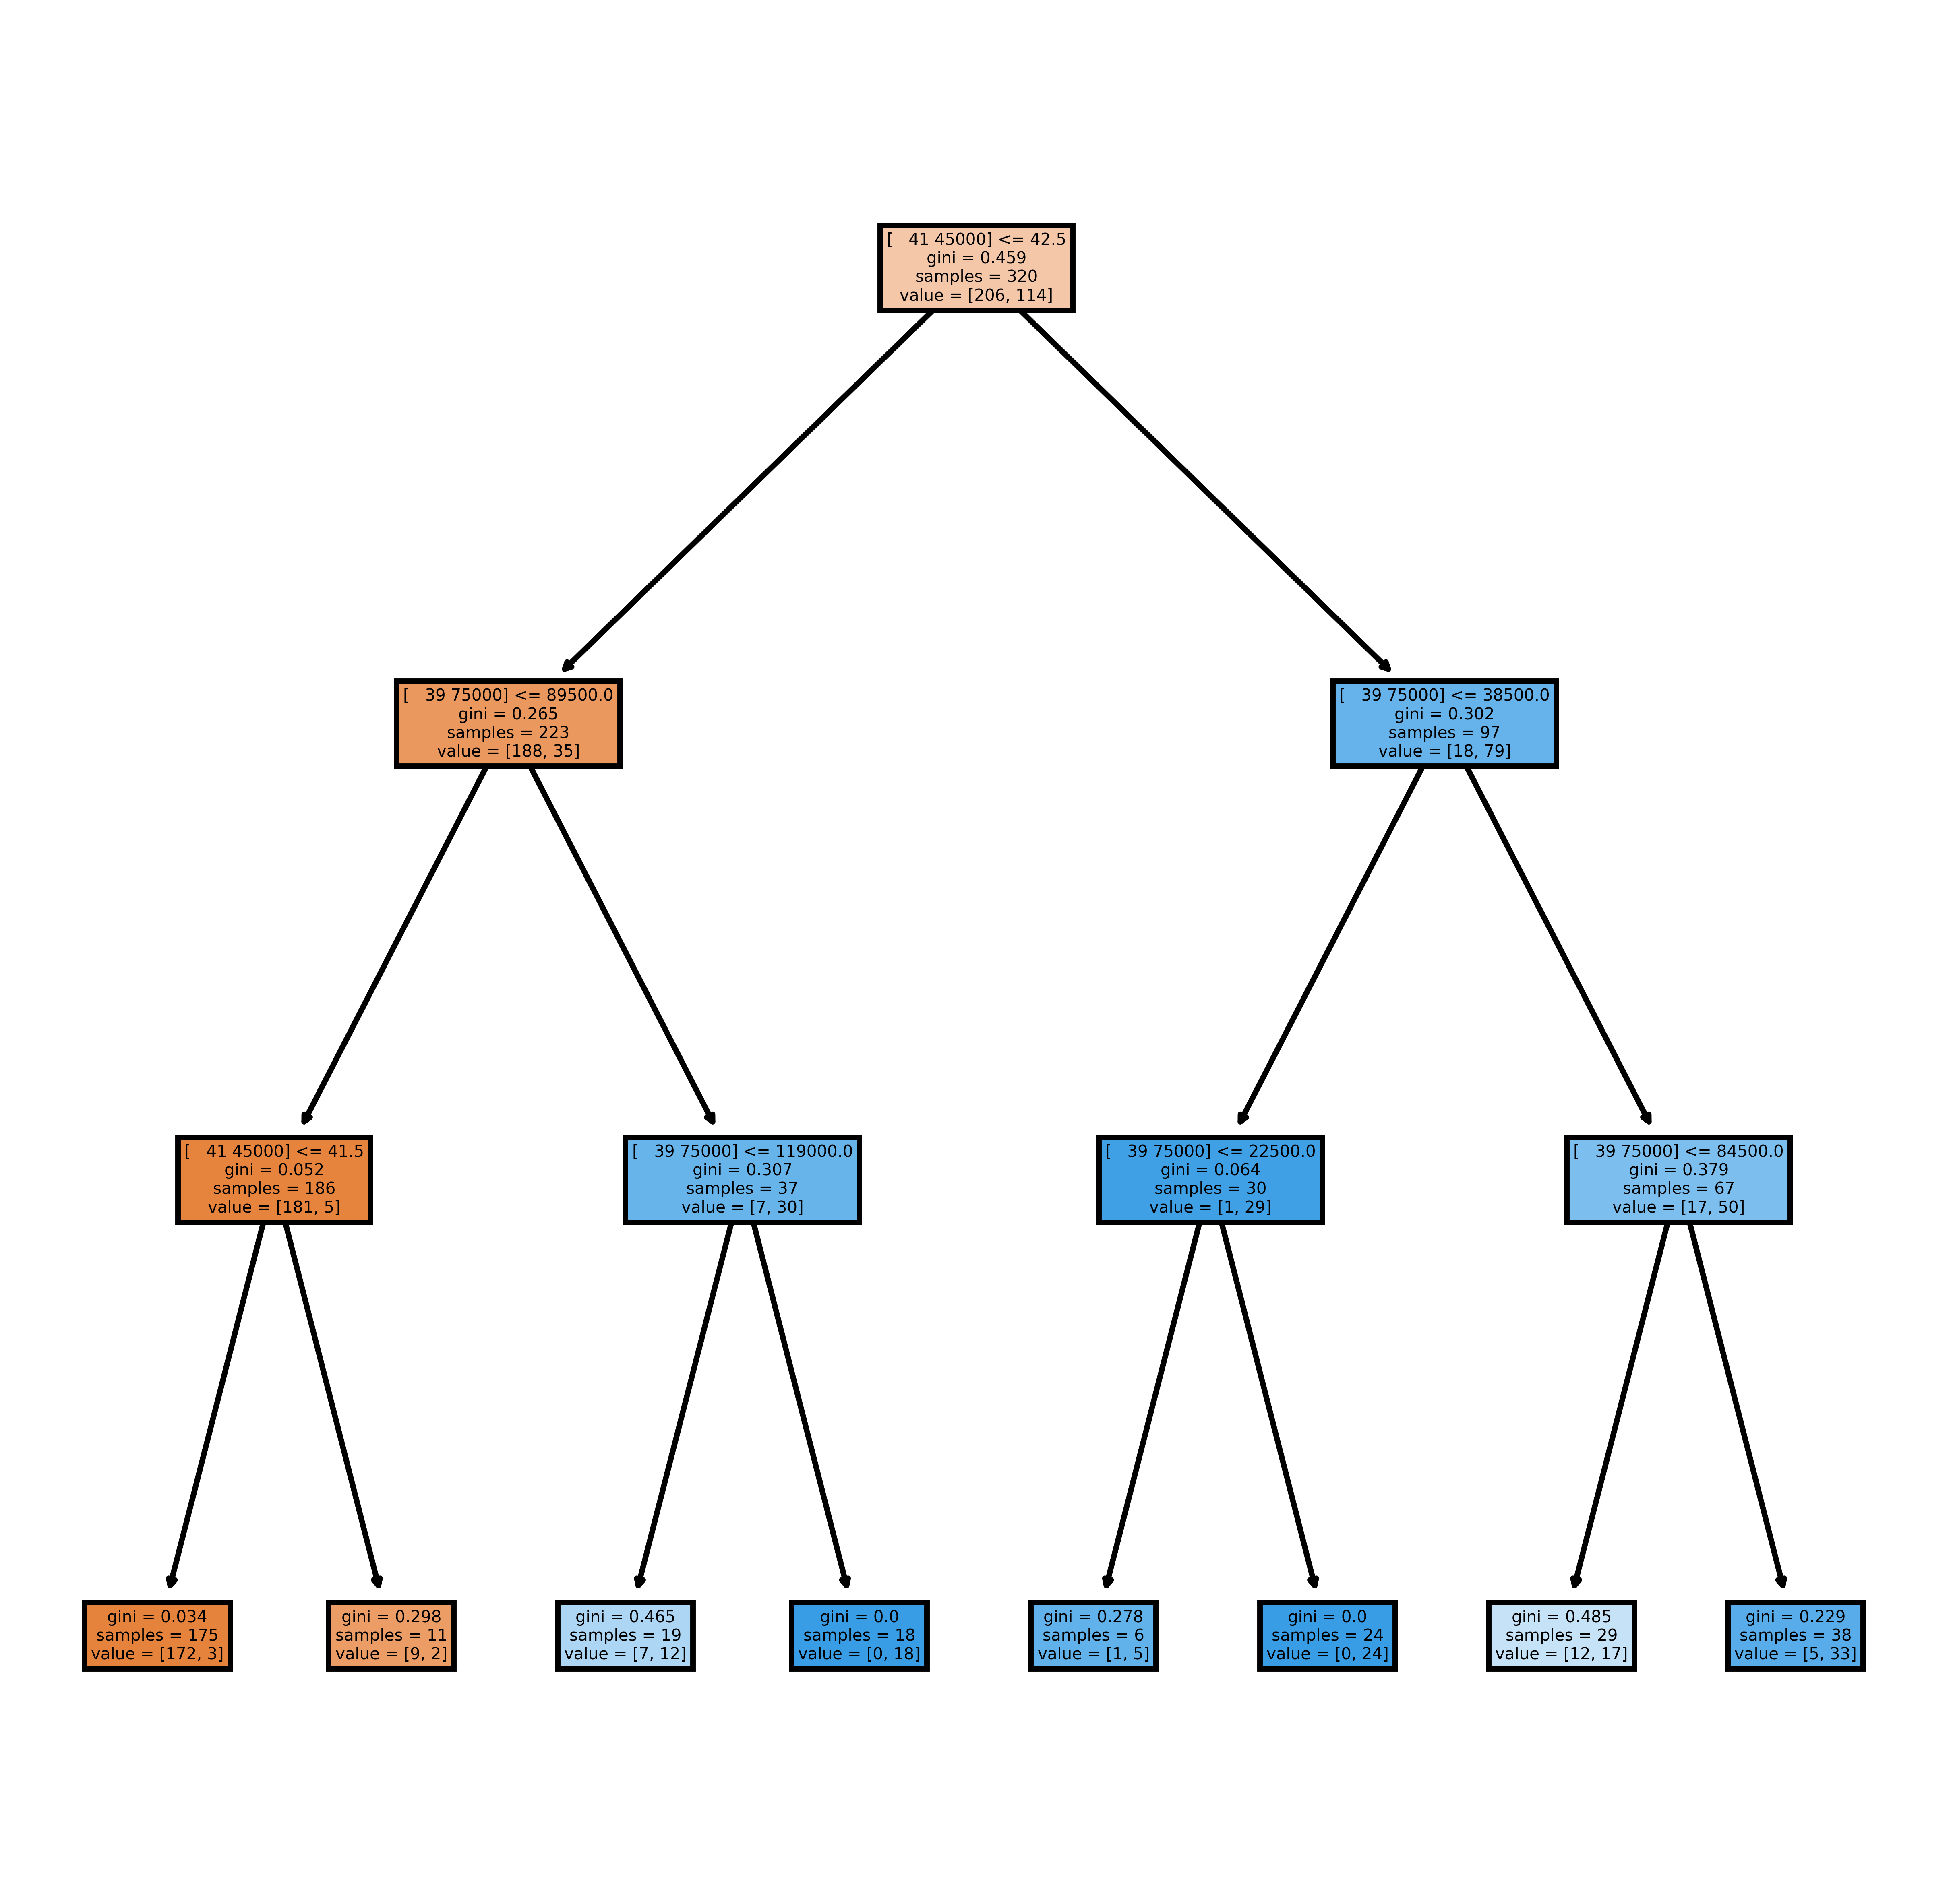

In [26]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6), dpi=1000)
tree.plot_tree(dt,feature_names=X_test,filled =True);
fig.savefig('imagename.png')